Load modules

In [1]:
using Plots
using NCDatasets
using Statistics: mean

Setup run-time enviromnent

In [2]:
ENV["GKSwstype"] = "100"

"100"

Specify needed directories and filenames: these will be replaced automatically by the bash run script or can be modified manually

In [3]:
CLIMA_NETCDF = "../netcdf/";

Get the current and previous  GCM netcdf file names in the CLIMA_NETCDF directory

In [4]:
fnames = filter(x -> occursin(".nc", x), readdir( CLIMA_NETCDF ) );
filename = "$CLIMA_NETCDF"fnames[end] # selects the last file on list

"../netcdf/HeldSuarez_AtmosGCMDefault_2020-09-17T12.05.33.296.nc"

extract data

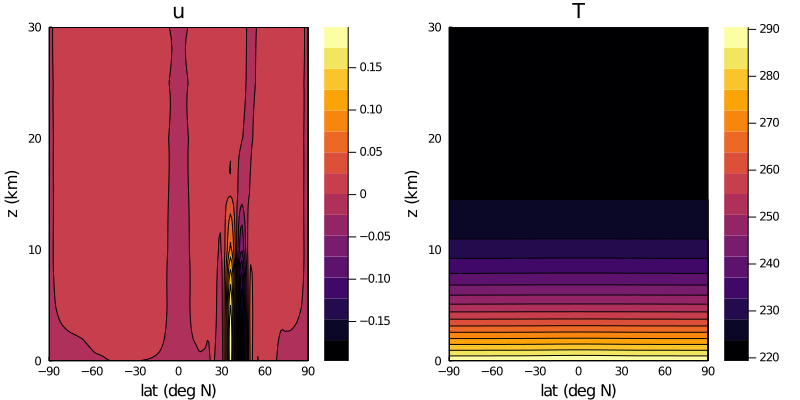

In [5]:
ds = NCDataset(filename, "r");
lon = ds["long"][:];
lat = ds["lat"][:];
lev = ds["level"][:] / 1e3; # height in kilometers
time = ds["time"][:];
u = ds["u"][:];
v = ds["v"][:];
T = ds["temp"][:];
close(ds)

# zonal mean:T and u at last diagnostic time
time_index = length(time)
u_zm = mean( u[:,:,:,:], dims=1)[1,:,:,:]; # lon, lat,lev, time
T_zm = mean( T[:,:,:,:], dims=1)[1,:,:,:]; # lon, lat,lev, time

plot1 = contourf( lat, lev, (u_zm[:,:,time_index])', title="u", xlabel="lat (deg N)", ylabel="z (km)");
plot_array = [plot1]
plot2 = contourf( lat, lev, (T_zm[:,:,time_index])', title="T", xlabel="lat (deg N)", ylabel="z (km)");
push!(plot_array,plot2);
fig=plot(plot_array... , layout=(1, 2), size=(800, 400) )
savefig(fig, "zontal_mean.pdf");
display(fig)

vertical slice of v at lev_index

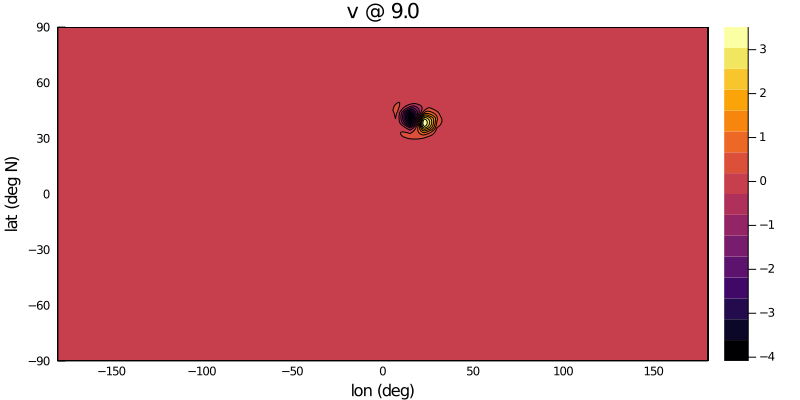

In [6]:
lev_index = 10
z_in_km = lev[lev_index]
v_plot = contourf( lon, lat, (v[:,:,lev_index,time_index])', title="v @ $z_in_km", xlabel="lon (deg)", ylabel="lat (deg N)");
fig=plot(v_plot, layout=(1, 1), size=(800, 400) )
savefig(fig, "vertical_slice.pdf");
display(fig)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*